In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Read and View Dataset

In [2]:
df = pd.read_csv('placesCleanedUp.txt', sep="\s+", header=None,index_col=False)
df.columns = ["CommunityState","Climate","HousingCost","HlthCare", "Crime","Transp", "Educ","Arts","Recreat","Econ","CaseNum","lat","lon","pop","statenum"]
df[['Community','State']] = df.CommunityState.apply( 
   lambda x: pd.Series(str(x).split(","))) 
df=df.drop(['CommunityState'],axis=1)
df

Climate  HousingCost  HlthCare  Crime  Transp  Educ  Arts  Recreat  Econ  \
0        521         6200       237    923    4031  2757   996     1405  7633   
1        575         8138      1656    886    4883  2438  5564     2632  4350   
2        468         7339       618    970    2531  2560   237      859  5250   
3        476         7908      1431    610    6883  3399  4655     1617  5864   
4        659         8393      1853   1483    6558  3026  4496     2612  5727   
..       ...          ...       ...    ...     ...   ...   ...      ...   ...   
324      562         8715      1805    680    3643  3299  1784      910  5040   
325      535         6440       317   1106    3731  2491   996     2140  4986   
326      540         8371       713    440    2267  2903  1022      842  4946   
327      570         7021      1097    938    3374  2920  2797     1327  3894   
328      608         7875       212   1179    2768  2387   122      918  4694   

     CaseNum       lat      lon     pop  statenum                Community  \
0          1  -99.6890  32.5590  110932        44                  Abilene   
1          2  -81.5180  41.0850  660328        36                    Akron   
2          3  -84.1580  31.5750  112402        11                   Albany   
3          4  -73.7983  42.7327  835880        35  Albany-Schenectady-Troy   
4          5 -106.6500  35.0830  419700        33              Albuquerque   
..       ...       ...      ...     ...       ...                      ...   
324      325  -71.7950  42.2720  402918        20                Worcester   
325      326 -120.5130  46.5950  172508        48                   Yakima   
326      327  -76.7280  39.9600  381255        39                     York   
327      328  -80.7290  41.1700  531350        36        Youngstown-Warren   
328      329 -121.6220  39.1280  101979         5                Yuba-City   

    State  
0      TX  
1      OH  
2      GA  
3      NY  
4      NM  
..    ...  
324    MA  
325    WA  
326    PA  
327    OH  
328    CA  

[329 rows x 16 columns]

## Step1: Normalize the data (StandardScaler uses Mean=0 and Stdev=1)

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [4]:
columns=['Climate', 'HousingCost','HlthCare','Crime','Transp','Educ','Arts','Recreat','Econ'] #,'CaseNum','lat','lon','pop','statenum'
dfScaler = df[columns]

#Initialize, fit(train) and transform data to normalize
scaler=StandardScaler()
scaler.fit(dfScaler)
scaled_data=scaler.transform(dfScaler)

#View in Frame
df_scaled = pd.DataFrame(scaled_data, columns=columns)
df_scaled = df_scaled.round(2)
df_scaled

Climate  HousingCost  HlthCare  Crime  Transp  Educ  Arts  Recreat  Econ
0      -0.15        -0.90     -0.95  -0.11   -0.12 -0.18 -0.46    -0.55  1.95
1       0.30        -0.09      0.47  -0.21    0.46 -1.18  0.52     0.97 -1.09
2      -0.59        -0.42     -0.57   0.03   -1.16 -0.80 -0.63    -1.22 -0.25
3      -0.52        -0.18      0.24  -0.98    1.84  1.82  0.32    -0.28  0.31
4       1.00         0.02      0.67   1.46    1.62  0.66  0.29     0.95  0.19
..       ...          ...       ...    ...     ...   ...   ...      ...   ...
324     0.19         0.15      0.62  -0.79   -0.39  1.51 -0.29    -1.16 -0.45
325    -0.03        -0.80     -0.87   0.41   -0.33 -1.01 -0.46     0.36 -0.50
326     0.01         0.01     -0.47  -1.46   -1.34  0.28 -0.46    -1.24 -0.54
327     0.26        -0.56     -0.09  -0.06   -0.58  0.33 -0.08    -0.64 -1.51
328     0.57        -0.20     -0.97   0.61   -1.00 -1.34 -0.65    -1.15 -0.77

[329 rows x 9 columns]

### How to select # of components?

#### Method 1: pass % 

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components = 0.95)
pca.fit(scaled_data)
reduced = pca.transform(scaled_data)
print('Original Dimensions: ',scaled_data.shape)  #14
print('Reduced Dimensions: ',reduced.shape) #11

Original Dimensions:  (329, 9)
Reduced Dimensions:  (329, 7)


> `95%` of variance is observed by `7 dimensions` 

#### Method 2: Select the number of components for PCA looking at plot

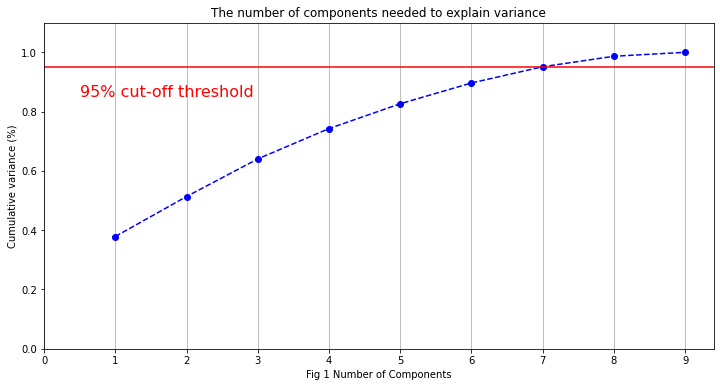

In [7]:
pca = PCA().fit(scaled_data)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Fig 1 Number of Components')
plt.xticks(np.arange(0, 10, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

> `95%` of variance is observed by `7 components` 

## Step 2 Perform PCA 
(use SVD or the eigenvalue decomposition of the covariance matrix)

In [8]:
pca=PCA(n_components=7)

In [9]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## Step 3 Scree plot and Variance Explained

#### A Scree plot displays how much variation each principal component captures from the data. If the first two or three PCs have capture most of the information, then we can ignore the rest without losing anything important. A scree plot shows how much variation each PC captures from the data. The y axis is eigenvalues, which essentially stand for the amount of variation. A scree plot is used to select the principal components to keep. An ideal curve should be steep, then bends at an “elbow” — this is the cutting-off point — and after that flattens out. In Figure 2 below, just PC 1, 2, and 3 seems enough to describe the data.

> A higher explained variance, captures more variability in dataset, which could potentially lead to better performance when training your model.

In [10]:
pca.explained_variance_

array([3.41868293, 1.21767731, 1.14495927, 0.9237255 , 0.75558148,
       0.63248434, 0.49455091])

In [11]:
pca.explained_variance_ratio_

array([0.37869909, 0.13488624, 0.12683102, 0.1023242 , 0.08369832,
       0.07006243, 0.05478308])

In [12]:
#cor_mat1 = np.corrcoef(scaled_data.T)
#eig_vals, eig_vecs = np.linalg.eig(cor_mat1)
#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

In [13]:
import seaborn as sn

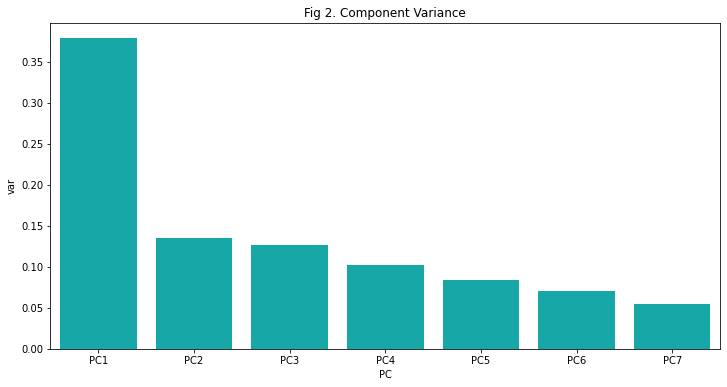

In [14]:
dfScree = pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7']})
sn.barplot(x='PC',y="var",data=dfScree, color="c").set_title('Fig 2. Component Variance');

In [15]:
x_pca=pca.transform(scaled_data)

In [16]:
scaled_data.shape

(329, 9)

In [17]:
x_pca.shape

(329, 7)

### Compute the correlations between the original data and each principal component

In [18]:
import seaborn as sn

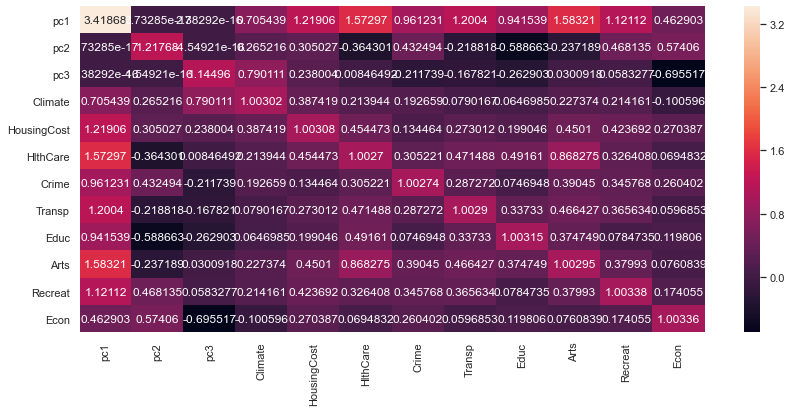

<Figure size 2016x1296 with 0 Axes>

In [19]:
df_pc = pd.DataFrame(data = x_pca, columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])
df_pc=df_pc.drop(['pc4'],axis=1)
df_pc=df_pc.drop(['pc5'],axis=1)
df_pc=df_pc.drop(['pc6'],axis=1)
df_pc=df_pc.drop(['pc7'],axis=1)

df_col = pd.concat([df_pc,df_scaled], axis=1)
df_col
covMatrix = pd.DataFrame.cov(df_col)
sn.set(rc={'figure.figsize':(14,6)})
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.figure(figsize=(28,18))
plt.show()

### Explain the Components observed

> PCA 1 - The first principal component is strongly correlated with five of the original variables. It increases with increasing `Arts`, `Health`, `Transportation`, `Housing` and `Recreation` scores.
communities with high values tend to have a lot of arts available, in terms of theaters, orchestras, etc.

>PCA 2 - The second principal component increases with decreasing `Education` and `Health`. This component can be viewed as a measure of how uneducated and unhealthy the location is in terms of education including available schools, universities and health care including doctors, hospitals, etc.

> PCA 3 - The third principal component decreases with only one of the values, decreasing `Economy`. It can be viewed as measure of how poor the state is in terms of business environment, jobs market and growth. 

## Step 4 Scatter plot all communities along two of the PCs (PC1 vs PC2 or PC1 vs PC3)

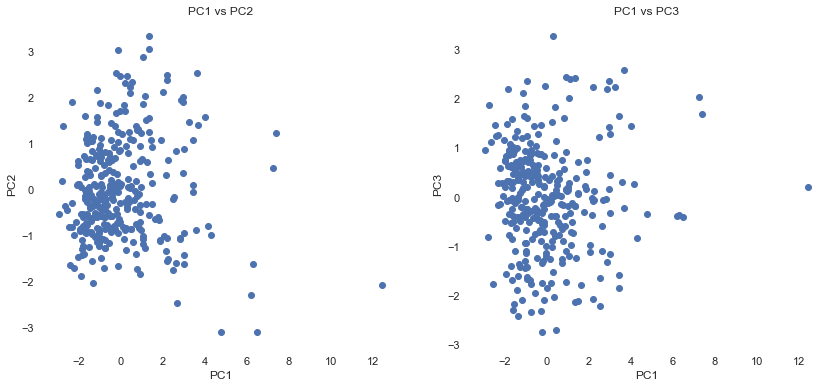

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(x_pca[:,0],x_pca[:,1])
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_frame_on(False)
ax1.grid(True)
ax1.set_title('PC1 vs PC2')

ax2.scatter(x_pca[:,0],x_pca[:,2])
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC3")
ax2.set_title('PC1 vs PC3')
ax2.grid(True)
ax2.set_frame_on(False)


### PCA biplot = PCA score plot + loading plot

#### The left and bottom axes are of the PCA plot. It shows PCA scores of the samples (dots). 
#### The top and right axes belong to the loading plot. It shows how strongly each characteristic (vector) influence the principal components.

In [21]:
import plotly.express as px

In [23]:
features = ['Climate', 'HousingCost','HlthCare','Crime','Transp','Educ','Arts','Recreat','Econ'] #,'CaseNum','lat','lon','pop','statenum'
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(x_pca, x=0, y=1)
for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0]*4.5,
        y1=loadings[i, 1]*4.5
    )
    fig.add_annotation(
        x=loadings[i, 0]*5.5,
        y=loadings[i, 1]*5.5,
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

## Plot STATES on principle components

In [24]:
def plotPCA(c1,c2):
    
    dict = {'NY':'g', 'FL':'y','TX':'b','CA':'r','PA':'navy','WA':'turquoise','IL':'darkorange'}  
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    ax.scatter(x_pca[:,c1-1],x_pca[:,c2-1])
    for i,(Community,u) in enumerate(zip(np.array(df),x_pca)):
        if df['State'][i] in dict:    
            ax.annotate(df['State'][i],(u[c1-1],u[c2-1]),color=dict[df['State'][i]])    
        else:
            ax.annotate(df['State'][i],(u[c1-1],u[c2-1]))

    ax.set_xlabel(f"PC{c1}")
    ax.set_ylabel(f"PC{c2}")
    ax.grid(True)
    ax.set_frame_on(False)
    title = 'States By ' + f"PC{c1}" + ' and ' + f"PC{c2}"
    ax.set_title(title)
    fig.savefig(title + '.png', dpi=75)
    
    return    

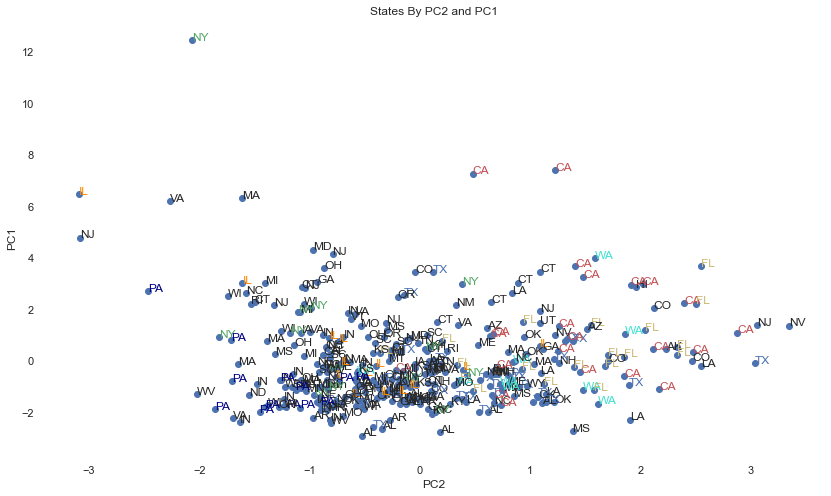

In [25]:
plotPCA(2, 1)        

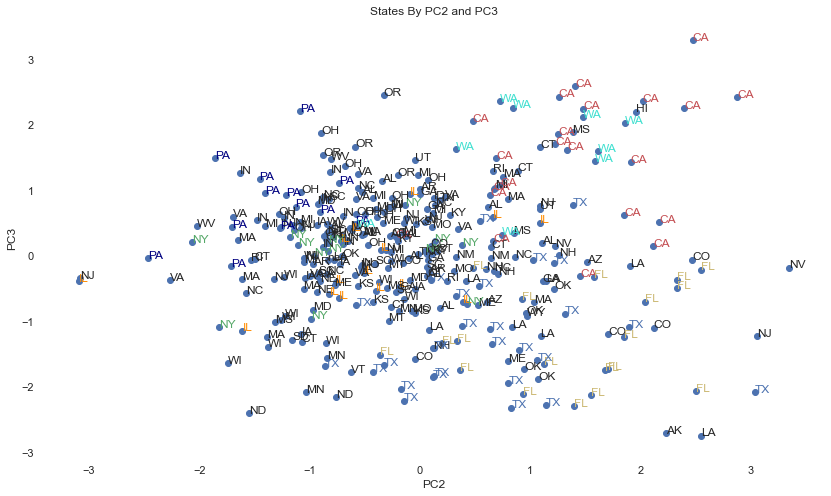

In [26]:
plotPCA(2, 3) 

> The angles between the vectors tell us how characteristics correlate with one another.
- When two vectors are close, forming a small angle, the two variables they represent are positively correlated. Example: `TX`  and `FL`. Similarly `CA` and `WA`
- If they meet each other at `90°`, they are not likely to be correlated. Example: `TX` and `PA`, similarly `TX` and `CA`
- When they diverge and form a large angle (close to `180°`), they are negative correlated. Example: `TX` and `OR`, similarly `PA` and `FL`.

### Plot Communities on principle components

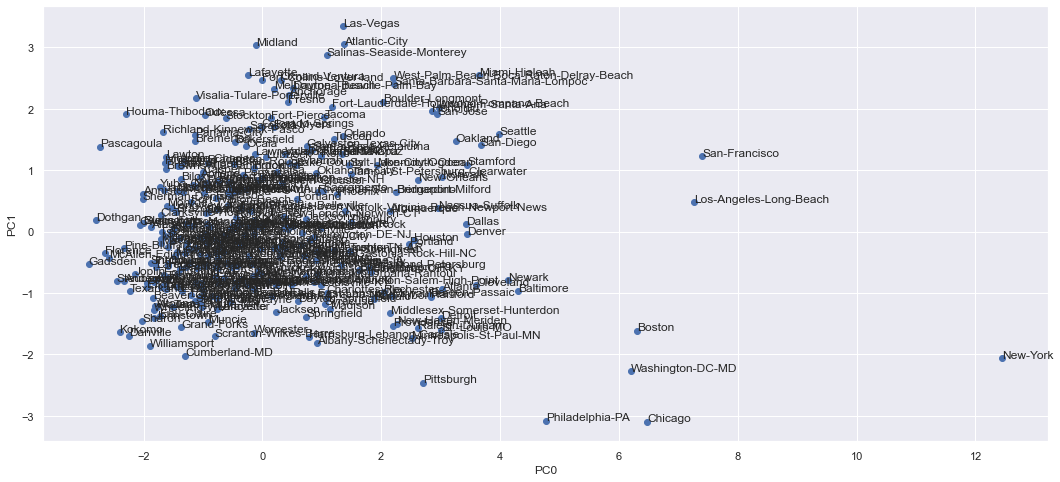

In [27]:
c1, c2 = 0, 1
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.scatter(x_pca[:,c1],x_pca[:,c2])
for i,(Community,u) in enumerate(zip(np.array(df),x_pca)):
     ax.annotate(df['Community'][i],(u[c1],u[c2]))
ax.grid(True)
ax.set_xlabel(f"PC{c1}")
ax.set_ylabel(f"PC{c2}")
ax.set_frame_on(True)
fig.savefig('Communities By PC1 PC2.png', dpi=75)

### Step 5: Scatter plot all original dimensions in the space of PC0 and PC1.

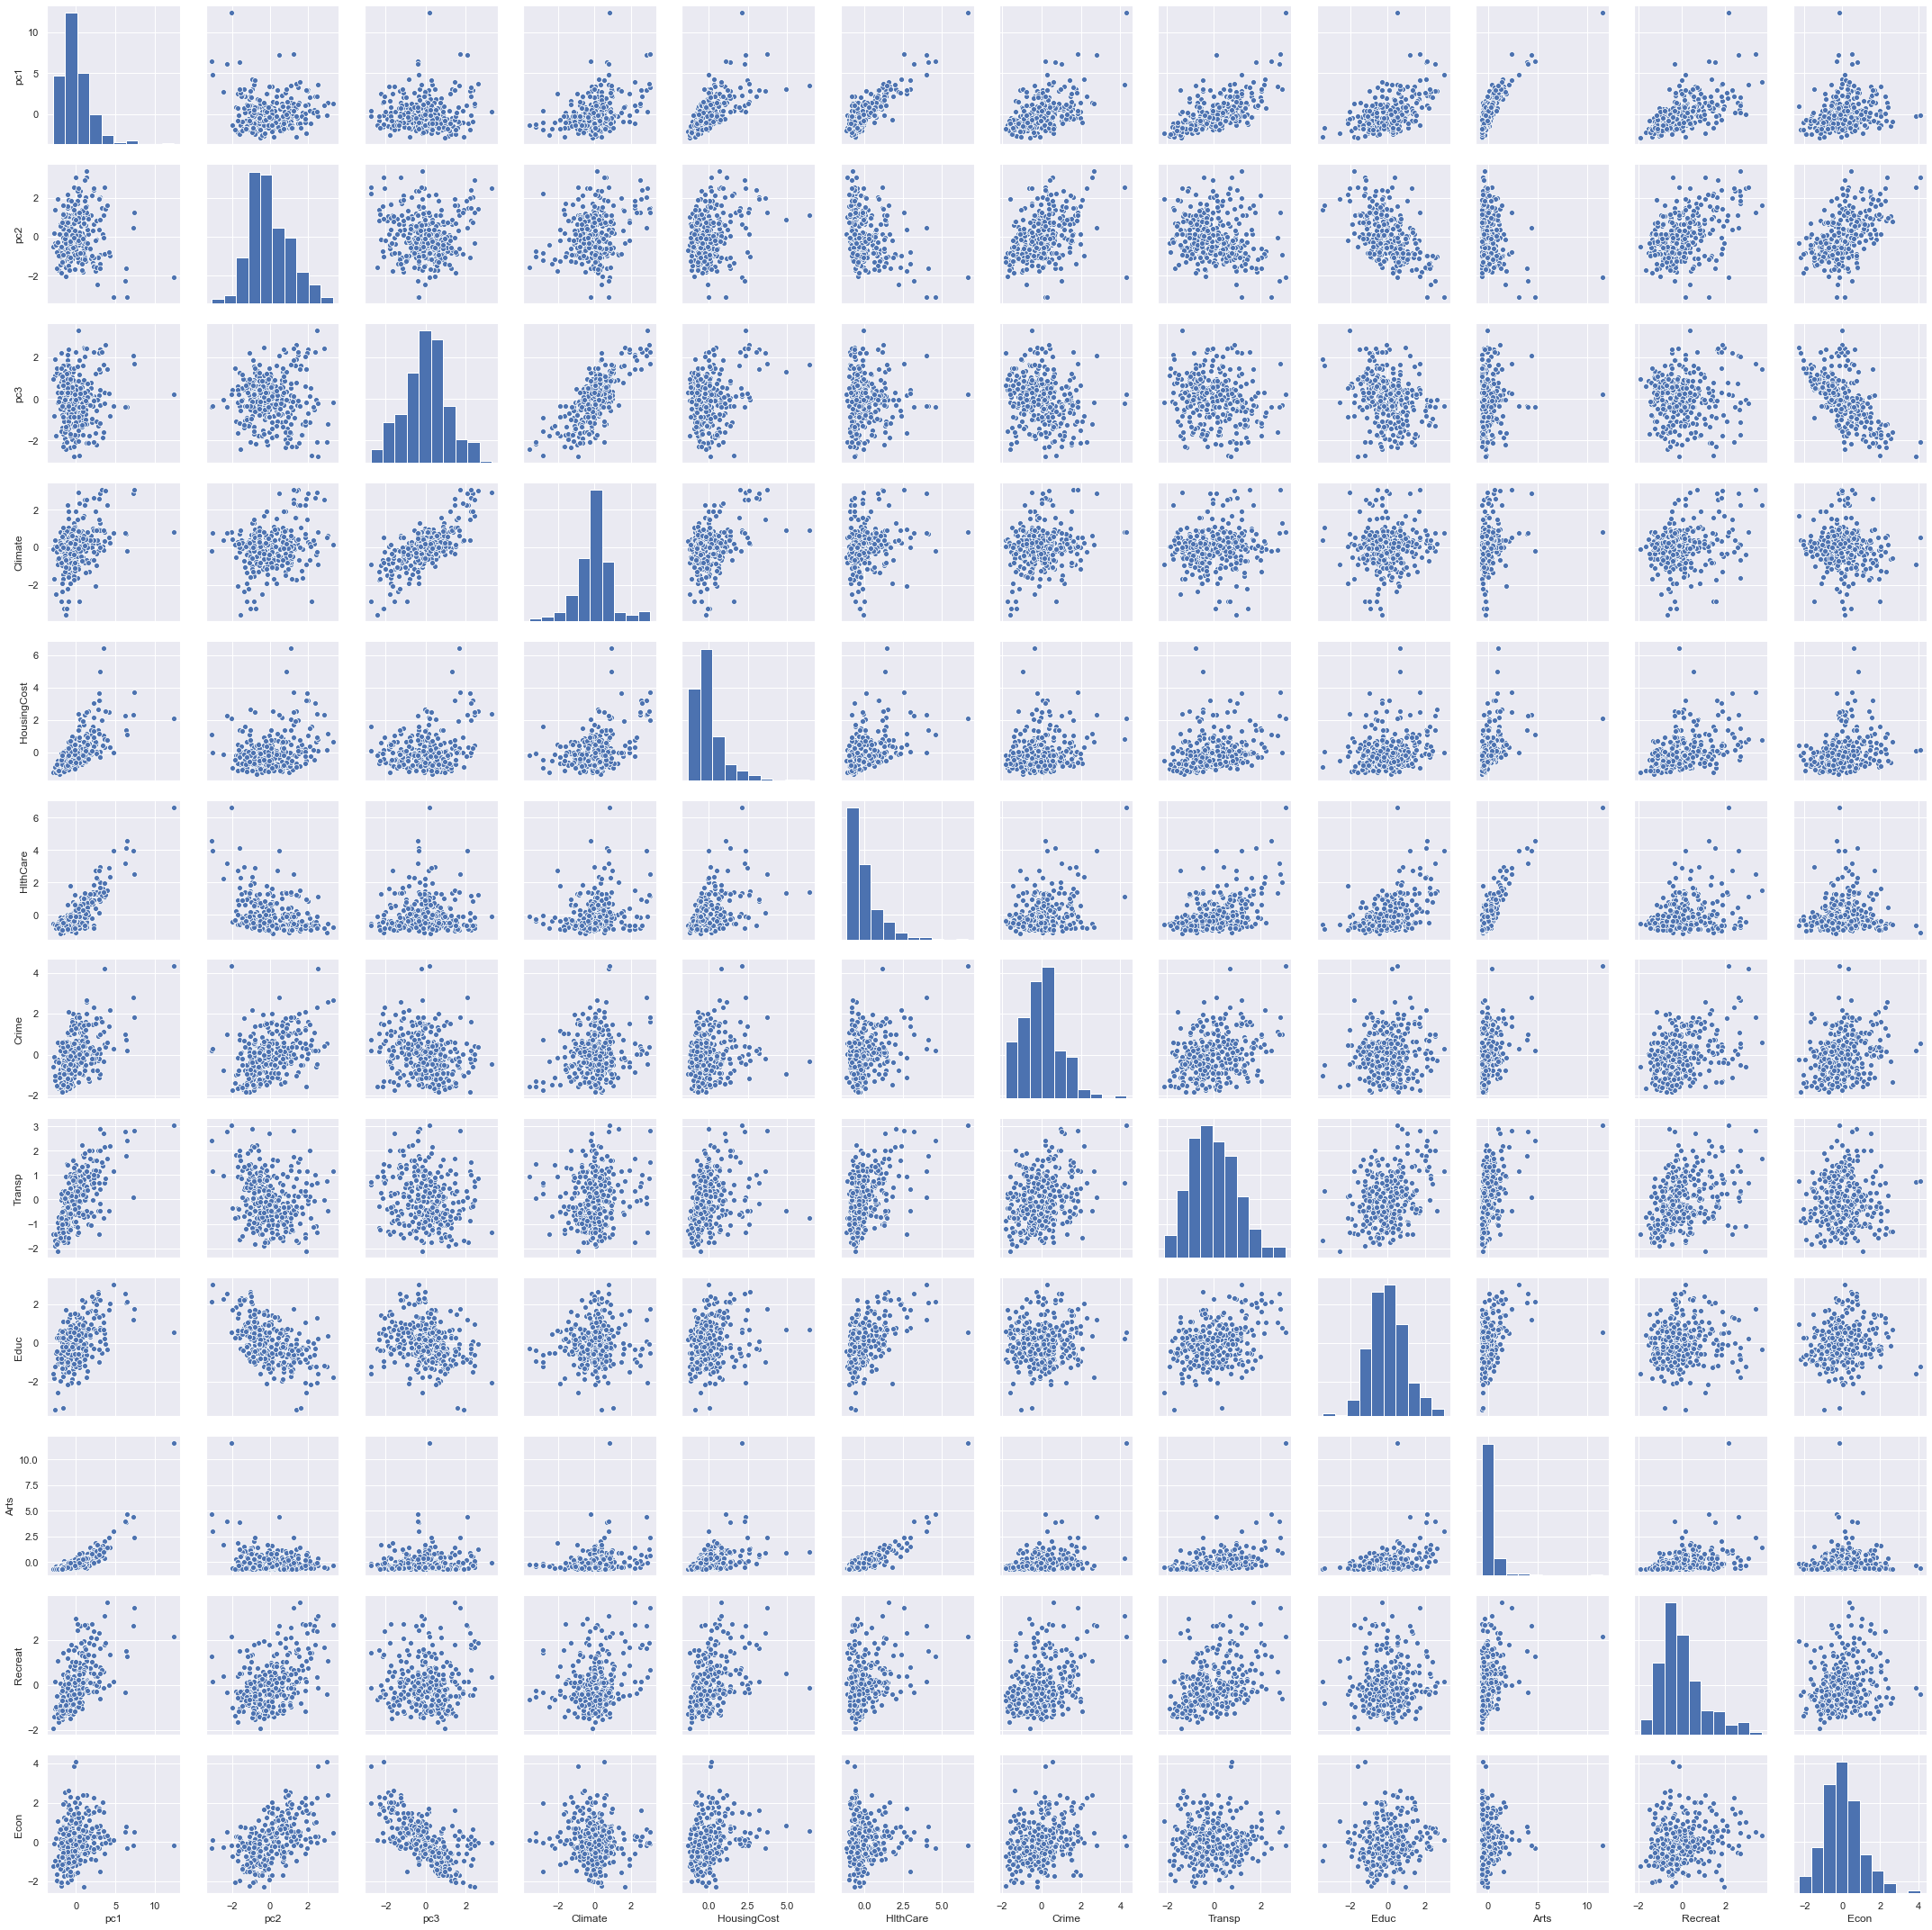

In [28]:
# without regression
sn.pairplot(df_col, kind="scatter")
plt.show()

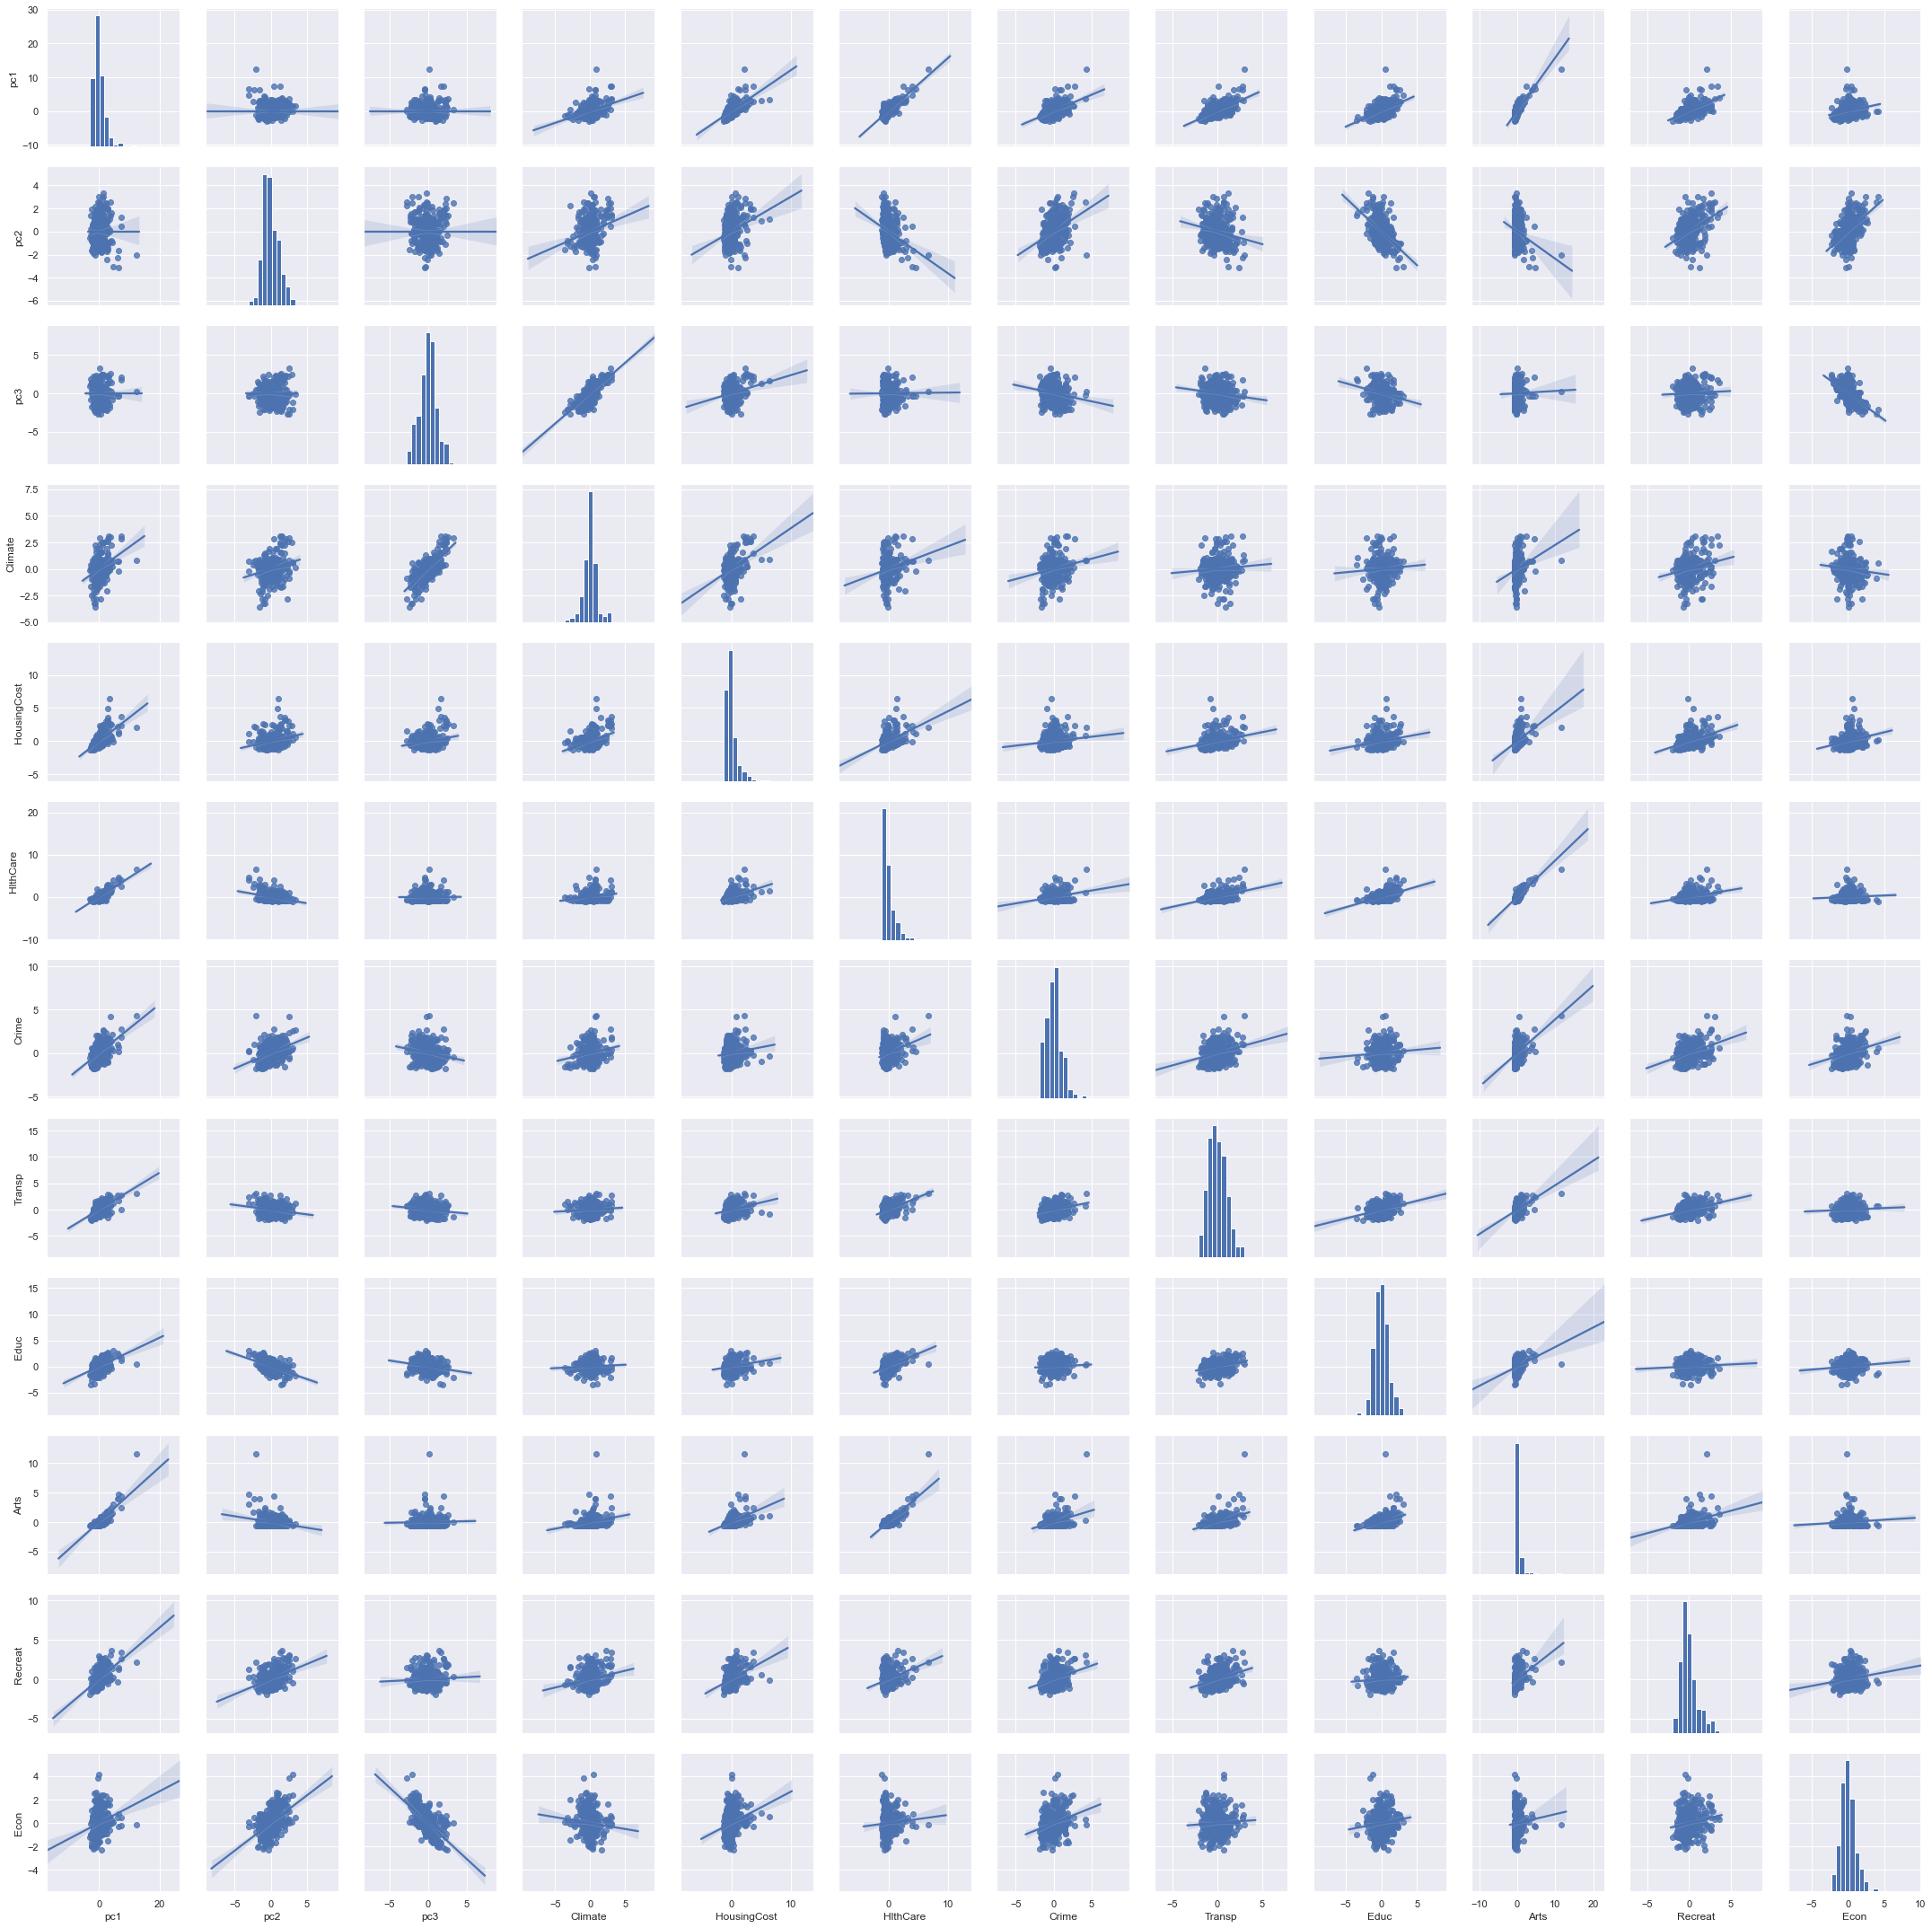

In [39]:
# with regression
sn.pairplot(df_col, kind="reg")
plt.show()

### Some interesting stuff

#### 3D chart

In [21]:
from mpl_toolkits import mplot3d

#### Add options for Interactions

In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


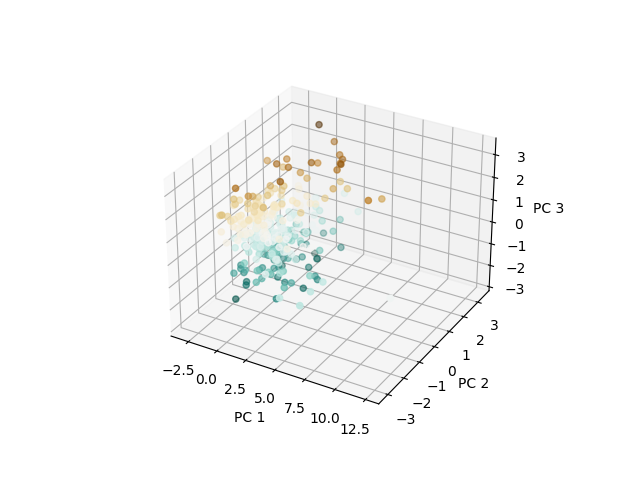

In [23]:
ax = plt.axes(projection='3d')
xline=x_pca[:,0]
yline=x_pca[:,1]
zline=x_pca[:,2]

ax.scatter3D(xline, yline, zline,c=zline,cmap='BrBG_r')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.show()

> The scatter points transparency gives a sense of depth in the figure.